In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.models import Model
import numpy as np
from numpy import asarray

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(32, 32,
3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu')) # Changed from 64 to 256
model.add(layers.Dense(10))
model.summary()
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=20,validation_data=(test_images, test_labels))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 4)         112       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 4)         0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 16)        592       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          9280      
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [8]:
img = test_images[3:4]  # Select the image
predictions = model.predict(img)
predicted_class = np.argmax(predictions, axis=1)
print("Predicted Class:", predicted_class)


1/1 [==============================] - 0s 312ms/step
Predicted Class: [0]


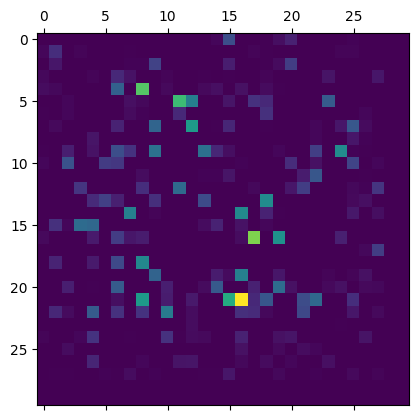

In [14]:

# Assuming 'model' is your pre-trained Keras model, and 'img' is the input image

# Get the last convolutional layer
last_conv_layer = model.get_layer('conv2d_3')

# Create an intermediate model with the specified layers
intermediate_model = tf.keras.models.Model(inputs=model.input, outputs=[last_conv_layer.output, model.output])


# Ensure the image has the right shape (remove the extra dimension and add batch dimension)
img = img[0]  # assuming img is of shape (1, 32, 32, 3)
img = np.squeeze(img, axis=0)  # remove the singleton batch dimension
img = np.expand_dims(img, axis=0)  # add a batch dimension back

# Use GradientTape to compute the gradient of the predicted class with respect to the feature map
with tf.GradientTape() as tape:
    conv_outputs, predictions = intermediate_model(img)
    loss = predictions[:, np.argmax(predictions[0])]
grads = tape.gradient(loss, conv_outputs)

# Compute the guided gradients (positive gradients)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# Multiply each feature map by its importance (gradient)
heatmap = tf.reduce_sum(tf.multiply(grads, conv_outputs), axis=-1)

# ReLU activation on the heatmap
heatmap = tf.maximum(heatmap, 0)

# Normalize the heatmap
heatmap /= tf.reduce_max(heatmap)

# Convert the tensor to a NumPy array
heatmap = heatmap.numpy()[0]

# Plot the heatmap
plt.matshow(heatmap)
plt.show()


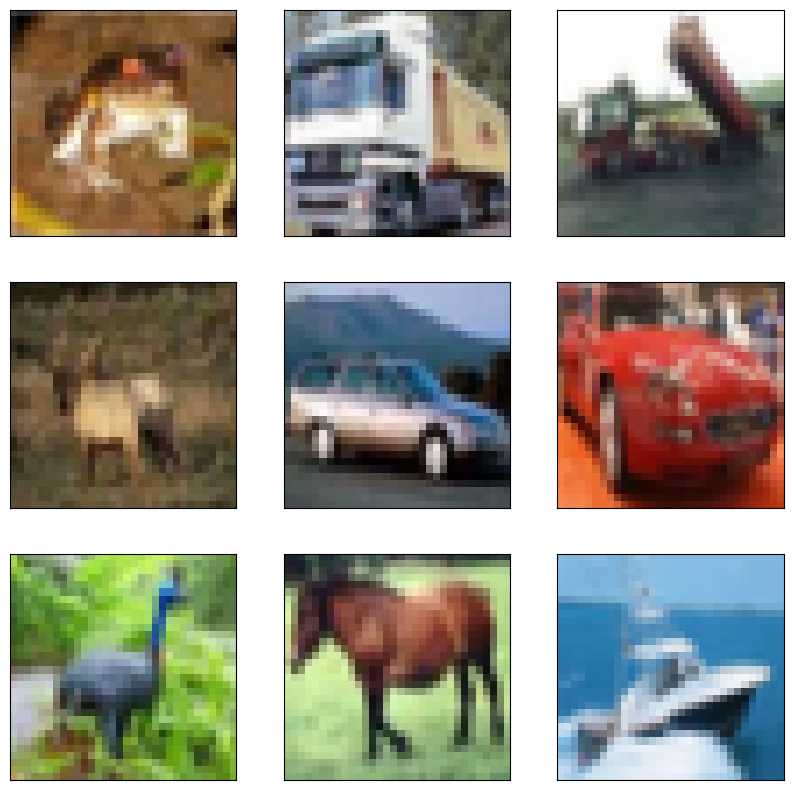

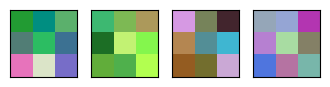

In [15]:
import matplotlib.pyplot as plt

# Assuming 'model' is your CNN model and 'train_images' or 'test_images' is your dataset

# Accessing the weights of the first convolutional layer
weights, biases = model.layers[0].get_weights()

# Normalize the weights
weights_min, weights_max = weights.min(), weights.max()
weights = (weights - weights_min) / (weights_max - weights_min)

# Plotting some images from the dataset
plt.figure(figsize=(10, 10))
for i in range(9):  # Plot 9 images
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)  # Change to your dataset variable
plt.show()

# Plotting the weights/filters of the first convolutional layer
num_filters = weights.shape[-1]  # Number of filters in the conv layer
plt.figure(figsize=(num_filters, 2))
for i in range(num_filters):
    plt.subplot(2, num_filters, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    filter = weights[:, :, :, i]
    plt.imshow(filter)
plt.show()


In [ ]:
pip install alibi


In [24]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
from PIL import Image

image_path = '/content/drive/My Drive/Explainable ML/Mensa.jpg'
with Image.open(image_path) as img:
    width, height = img.size

print(f"Width {width} pixels.")
print(f"Height {height} pixels high.")



Width 1198 pixels.
Height 666 pixels high.


In [35]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model


model = Sequential([
    Conv2D(1, (3, 3), activation='relu', input_shape=(4, 4, 1)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

det = np.array([[[[0]], [[1]], [[0]]],
                [[[0]], [[1]], [[0]]],
                [[[0]], [[1]], [[0]]]])

model.layers[0].set_weights([det, np.array([0.0])])

# Model summary
model.summary()

# Test data
array_data = np.array([[2, 7, 5, 1],
                       [4, 1, 9, 0],
                       [1, 6, 2, 3],
                       [8, 5, 6, 1]])
array_data = array_data.reshape(1, 4, 4, 1)

layer_outputs = [layer.output for layer in model.layers[:1]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
#first_layer_output = activation_model.predict(array_data)

# Plot the output of the first layer
#plt.matshow(first_layer_output[0, :, :, 0], cmap='viridis')
plt.show()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 2, 2, 1)           10        
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 1, 1, 1)           0         
 ng2D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 1)                 0         
                                                                 
 dense_22 (Dense)            (None, 10)                20        
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________

In [33]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt

# Build the model
model = Sequential([
    Conv2D(1, (3, 3), activation='relu', input_shape=(4, 4, 1)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

det = np.array([[[[0]], [[1]], [[0]]],
                [[[0]], [[1]], [[0]]],
                [[[0]], [[1]], [[0]]]])

model.layers[0].set_weights([det, np.array([0.0])])

# Model summary
model.summary()

# Test data
array_data = np.array([[2, 7, 5, 1],
                       [4, 1, 9, 0],
                       [1, 6, 2, 3],
                       [8, 5, 6, 1]])
array_data = array_data.reshape(1, 4, 4, 1)

# Extract the output of the first layer
layer_output = model.layers[0].output
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_output)
#first_layer_output = activation_model.predict(array_data)

# Convert the TensorFlow tensor to a NumPy array and extract values
#output_array = first_layer_output[0].numpy().squeeze()

# Plot the output of the first layer
#plt.matshow(output_array, cmap='viridis')
plt.show()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 2, 2, 1)           10        
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 1, 1, 1)           0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 1)                 0         
                                                                 
 dense_18 (Dense)            (None, 10)                20        
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
__________________